In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
df= pd.read_csv('spam.csv', sep=',', encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df.iloc[:,:2]
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
#Data preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
# Creating Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()


In [7]:
y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [8]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [9]:
# Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

acc_score=accuracy_score(y_test, y_pred)
p_score=precision_score(y_test,y_pred)
re_score=recall_score(y_test,y_pred)
f_score=f1_score(y_test,y_pred)
print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.9883408071748879
precision score of the model is 0.9591836734693877
recall score of the model is 0.9527027027027027
f1_score of the model is 0.9559322033898305


In [11]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[961,   6],
       [  7, 141]], dtype=int64)

<AxesSubplot:>

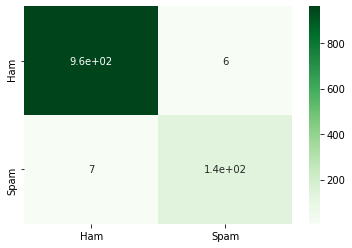

In [12]:
x_axis_labels = ['Ham','Spam']
y_axis_labels = ['Ham','Spam']

sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)